# 第6章: 単語ベクトル

単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して、以下の処理を行うプログラムを作成せよ。

In [1]:
!pip install --upgrade gensim numpy scipy

  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached scipy-1.15.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)


In [2]:
!pip install gdown

In [3]:
!gdown 0B7XkCwpI5KDYNlNUTTlSS21pQmM

Downloading...
From (original): https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
From (redirected): https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM&confirm=t&uuid=4e1be5b8-fa1d-454d-a602-a82c887e3e14
To: /content/GoogleNews-vectors-negative300.bin.gz
100% 1.65G/1.65G [00:10<00:00, 159MB/s]


In [6]:
!gunzip /content/GoogleNews-vectors-negative300.bin.gz

## 50. 単語ベクトルの読み込みと表示

Google Newsデータセット（約1,000億単語）での[学習済み単語ベクトル](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing)（300万単語・フレーズ、300次元）をダウンロードし、"United States"の単語ベクトルを表示せよ。ただし、"United States"は内部的には"United_States"と表現されていることに注意せよ。

In [5]:
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format(
    '/content/GoogleNews-vectors-negative300.bin', binary=True
)
united_states = model['United_States']
print(united_states)


[-3.61328125e-02 -4.83398438e-02  2.35351562e-01  1.74804688e-01
 -1.46484375e-01 -7.42187500e-02 -1.01562500e-01 -7.71484375e-02
  1.09375000e-01 -5.71289062e-02 -1.48437500e-01 -6.00585938e-02
  1.74804688e-01 -7.71484375e-02  2.58789062e-02 -7.66601562e-02
 -3.80859375e-02  1.35742188e-01  3.75976562e-02 -4.19921875e-02
 -3.56445312e-02  5.34667969e-02  3.68118286e-04 -1.66992188e-01
 -1.17187500e-01  1.41601562e-01 -1.69921875e-01 -6.49414062e-02
 -1.66992188e-01  1.00585938e-01  1.15722656e-01 -2.18750000e-01
 -9.86328125e-02 -2.56347656e-02  1.23046875e-01 -3.54003906e-02
 -1.58203125e-01 -1.60156250e-01  2.94189453e-02  8.15429688e-02
  6.88476562e-02  1.87500000e-01  6.49414062e-02  1.15234375e-01
 -2.27050781e-02  3.32031250e-01 -3.27148438e-02  1.77734375e-01
 -2.08007812e-01  4.54101562e-02 -1.23901367e-02  1.19628906e-01
  7.44628906e-03 -9.03320312e-03  1.14257812e-01  1.69921875e-01
 -2.38281250e-01 -2.79541016e-02 -1.21093750e-01  2.47802734e-02
  7.71484375e-02 -2.81982

## 51. 単語の類似度

"United States"と"U.S."のコサイン類似度を計算せよ。

In [8]:
import numpy as np
us = model['U.S.']

dot_product = np.dot(united_states, us)
norm_united_states = np.linalg.norm(united_states)
norm_us = np.linalg.norm(us)

cosine_similarity = dot_product / (norm_united_states * norm_us)
print(cosine_similarity)

0.7310775


## 52. 類似度の高い単語10件

"United States"とコサイン類似度が高い10語と、その類似度を出力せよ。

In [9]:
similar_words = model.most_similar('United_States', topn=10)
print('United Statesとコサイン類似度が高いトップ10の単語')
for word, similarity in similar_words:
    print(f'{word}: {similarity: .4f}')

United Statesとコサイン類似度が高いトップ10の単語
Unites_States:  0.7877
Untied_States:  0.7541
United_Sates:  0.7401
U.S.:  0.7311
theUnited_States:  0.6404
America:  0.6178
UnitedStates:  0.6167
Europe:  0.6133
countries:  0.6045
Canada:  0.6019


## 53. 加法構成性によるアナロジー

"Spain"の単語ベクトルから"Madrid"のベクトルを引き、"Athens"のベクトルを足したベクトルを計算し、そのベクトルと類似度の高い10語とその類似度を出力せよ。

In [12]:
# spain = model['Spain']
# madrid = model['Madrid']
# athens = model['Athens']

# vector = spain - madrid + athens

# similar_words = model.most_similar(positive=[vector], topn=10)
# positiveに入れたものを1位に来ないようにするために結果が変わる可能性がある
similar_words = model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'], topn=10)
print('Spain - Madrid + Athensとコサイン類似度が高いトップ10の単語')
for word, similarity in similar_words:
    print(f'{word}: {similarity: .4f}')

Spain - Madrid + Athensとコサイン類似度が高いトップ10の単語
Greece:  0.6898
Aristeidis_Grigoriadis:  0.5607
Ioannis_Drymonakos:  0.5553
Greeks:  0.5451
Ioannis_Christou:  0.5401
Hrysopiyi_Devetzi:  0.5248
Heraklio:  0.5208
Athens_Greece:  0.5169
Lithuania:  0.5167
Iraklion:  0.5147


## 54. アナロジーデータでの実験

[単語アナロジーの評価データ](http://download.tensorflow.org/data/questions-words.txt)をダウンロードし、国と首都に関する事例（`: capital-common-countries`セクション）に対して、vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し、そのベクトルと類似度が最も高い単語と、その類似度を求めよ。求めた単語と類似度は、各事例と一緒に記録せよ。

In [13]:
!wget http://download.tensorflow.org/data/questions-words.txt

--2025-05-11 02:23:53--  http://download.tensorflow.org/data/questions-words.txt
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.142.207, 142.251.188.207, 192.178.163.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.142.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: ‘questions-words.txt’

questions-words.txt 100%[===================>] 589.80K  --.-KB/s    in 0.002s  

2025-05-11 02:23:54 (236 MB/s) - ‘questions-words.txt’ saved [603955/603955]



In [42]:
import pandas as pd
from tqdm import tqdm
import re

def calc_sim(row):
    global model
    return pd.Series(
        list(
            model.most_similar(positive=[row['word2'], row['word3']], negative=[row['word1']])[0]
        )
    )

def generate_analogy_predictions_from_section(section_to_process, file_path):
    tqdm.pandas()

    capital_common_countries_data = []
    in_section = False
    with open(file_path, 'r') as f:
        for line in f:
            line = line.strip()
            if line == section_to_process:
                in_section = True
                continue
            elif line.startswith(':'):
                if in_section:
                    break
                in_section = False
                continue

            if in_section and line:
                parts = line.split(' ')
                if len(parts) == 4:
                    capital_common_countries_data.append(parts)



    df = pd.DataFrame(capital_common_countries_data, columns=["word1", "word2", "word3", "word4"])
    df.dropna(inplace=True)

    df[["most_similary_word", "cosine_similarity"]] = df.progress_apply(calc_sim, axis=1)

    base_filename = section_to_process.replace(":", "").strip()
    safe_filename_part = re.sub(r'[^\w-]', '_', base_filename)
    output_filename = f"analogy_results_{safe_filename_part}.txt"
    output_file_path = f"/content/{output_filename}"

    df.to_csv(output_file_path, sep=" ", index=False, header=None)



In [43]:
file_path = '/content/questions-words.txt'
section_to_process = ': capital-common-countries'

generate_analogy_predictions_from_section(section_to_process=section_to_process, file_path=file_path)

100%|██████████| 506/506 [03:38<00:00,  2.31it/s]


## 55. アナロジータスクでの正解率

54の実行結果を用い、意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ。

In [44]:
def calc_accuracy(file_path):
    df = pd.read_csv(file_path, sep=' ', header=None)
    number_of_correct = (df[3] == df[4]).sum()
    print(f'{number_of_correct}/{len(df)}')
    print(f'accuracy: {number_of_correct / len(df)}')

In [45]:
file_path = '/content/analogy_results_capital-common-countries.txt'
calc_accuracy(file_path)

421/506
accuracy: 0.8320158102766798


In [46]:
file_path = '/content/questions-words.txt'
section_to_process = ': gram1-adjective-to-adverb'

generate_analogy_predictions_from_section(section_to_process=section_to_process, file_path=file_path)

100%|██████████| 992/992 [07:18<00:00,  2.26it/s]


In [47]:
file_path = '/content/analogy_results_gram1-adjective-to-adverb.txt'
calc_accuracy(file_path)

283/992
accuracy: 0.2852822580645161


## 56. WordSimilarity-353での評価

[The WordSimilarity-353 Test Collection](http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.html)の評価データをダウンロードし、単語ベクトルにより計算される類似度のランキングと、人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ。

In [48]:
!wget https://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
!unzip /content/wordsim353.zip

--2025-05-11 06:50:26--  https://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving www.gabrilovich.com (www.gabrilovich.com)... 173.236.137.139
Connecting to www.gabrilovich.com (www.gabrilovich.com)|173.236.137.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23257 (23K) [application/zip]
Saving to: ‘wordsim353.zip’

wordsim353.zip      100%[===================>]  22.71K  --.-KB/s    in 0.06s   

2025-05-11 06:50:27 (366 KB/s) - ‘wordsim353.zip’ saved [23257/23257]

Archive:  /content/wordsim353.zip
  inflating: combined.csv            
  inflating: set1.csv                
  inflating: set2.csv                
  inflating: combined.tab            
  inflating: set1.tab                
  inflating: set2.tab                
  inflating: instructions.txt        


In [49]:
from scipy.stats import spearmanr
import csv

dataset_path = '/content/combined.csv'
human_scores = []
model_scores = []

with open(dataset_path, 'r') as f:
    reader = csv.reader(f)
    header = next(reader, None)

    for i, row in enumerate(reader):
        word1 = row[0].strip()
        word2 = row[1].strip()

        human_score = row[2]

        similarity = model.similarity(word1, word2)
        human_scores.append(human_score)
        model_scores.append(similarity)

spearman_corr, p_value = spearmanr(human_scores, model_scores)

print(f"スピアマン相関係数: {spearman_corr:.4f}")
print(f"p値: {p_value:.4f}")

スピアマン相関係数: 0.6850
p値: 0.0000


## 57. k-meansクラスタリング

国名に関する単語ベクトルを抽出し、k-meansクラスタリングをクラスタ数k=5として実行せよ。

クラスタ 0: Mexico, Brazil, Argentina, Chile, Colombia, Peru
クラスタ 1: USA, UK, Germany, France, Italy, Spain, Portugal, Netherlands, Belgium, Sweden, Norway, Finland, Denmark, Poland, Hungary, Czech, Greece, Zealand
クラスタ 2: Korea
クラスタ 3: Egypt, Nigeria, Kenya, Ethiopia, Ghana, Sudan, Algeria, Morocco
クラスタ 4: Japan, China, India, Thailand, Vietnam, Indonesia, Malaysia, Philippines, Singapore, Canada, Russia, Australia


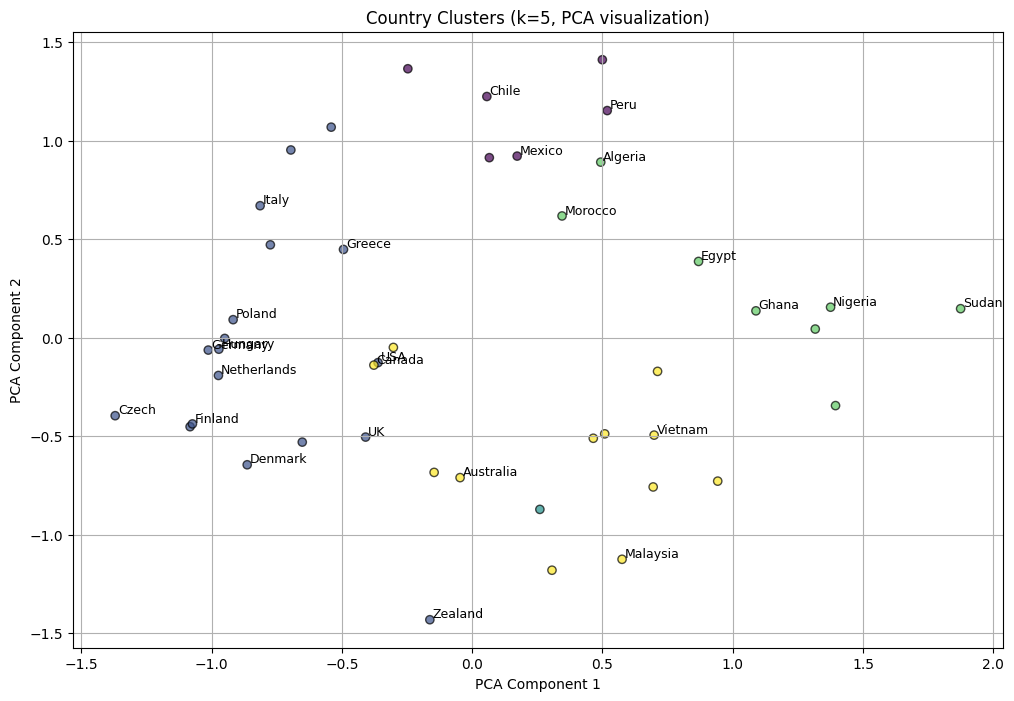

In [53]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import random

country_names_full = [
    "Japan", "China", "Korea", "India", "Thailand", "Vietnam", "Indonesia", "Malaysia", "Philippines", "Singapore",
    "USA", "Canada", "Mexico", "Brazil", "Argentina", "Chile", "Colombia", "Peru",
    "UK", "Germany", "France", "Italy", "Spain", "Portugal", "Netherlands", "Belgium", "Sweden", "Norway", "Finland", "Denmark",
    "Russia", "Poland", "Hungary", "Czech", "Greece",
    "Egypt", "Nigeria", "Kenya", "Ethiopia", "Ghana", "Sudan", "Algeria", "Morocco",
    "Australia", "Zealand"
]

country_names_in_vocab = []
country_vectors = []
oov_countries = []

for country in country_names_full:
    try:
        vector = model[country]
        country_names_in_vocab.append(country)
        country_vectors.append(vector)
    except KeyError:
        oov_countries.append(country)

country_vectors_np = np.array(country_vectors)

X = country_vectors_np

k = 5

kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
kmeans.fit(X)
labels = kmeans.labels_

clusters = {}

for i, country_name in enumerate(country_names_in_vocab):
    cluster_id = labels[i]
    if cluster_id not in clusters:
        clusters[cluster_id] = []
    clusters[cluster_id].append(country_name)

for cluster_id, countries_in_cluster in sorted(clusters.items()):
    print(f"クラスタ {cluster_id}: {', '.join(countries_in_cluster)}")

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.7, edgecolors='k')

num_labels_to_show = min(25, len(country_names_in_vocab))
indices_to_label = random.sample(range(len(country_names_in_vocab)), num_labels_to_show)

for i in indices_to_label:
    plt.text(X_pca[i, 0] + 0.01, X_pca[i, 1] + 0.01, country_names_in_vocab[i], fontsize=9)

plt.title(f'Country Clusters (k={k}, PCA visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)

## 58. Ward法によるクラスタリング

国名に関する単語ベクトルに対し、Ward法による階層型クラスタリングを実行せよ。さらに、クラスタリング結果をデンドログラムとして可視化せよ。

## 59. t-SNEによる可視化

ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ。